In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [115]:
keypoints_all = pd.read_json('./Keypoints_All.json', orient='records')
new_columns = ['Gesture', 'Sub folder No.', 'Frame No.', 'Person', 'Joint', 'X', 'Y', 'Probability', 'Depth']
keypoints_all = keypoints_all.reindex(columns = new_columns)
print('keypoints_all shape', keypoints_all.shape)
keypoints_all.head()

keypoints_all shape (181375, 9)


,Gesture,Sub folder No.,Frame No.,Person,Joint,X,Y,Probability,Depth
0,1,1,1,0,0,0.0,0.0,0.0,0.031373
1,1,1,1,0,1,0.0,0.0,0.0,0.031373
2,1,1,1,0,2,0.0,0.0,0.0,0.031373
3,1,1,1,0,3,0.0,0.0,0.0,0.031373
4,1,1,1,0,4,0.0,0.0,0.0,0.031373


In [116]:
keypoints_1_7 = keypoints_all[keypoints_all['Joint'].isin(range(1,8))]
print('keypoints_1_7 shape', keypoints_1_7.shape)

keypoints_1_7 shape (50785, 9)


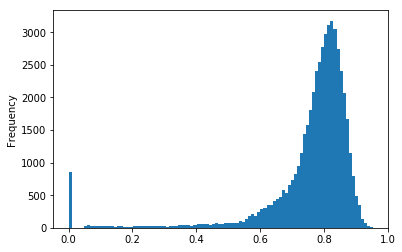

In [117]:
keypoints_1_7['Probability'].plot.hist(bins=100)
plt.show()

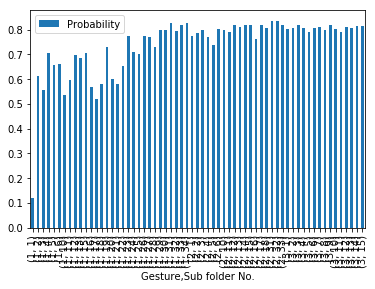

In [118]:
# keypoints_1_7_low_probability.groupby(by='Gesture')
keypoints_1_7_subfolder_prob = pd.pivot_table(keypoints_1_7, index=['Gesture', 'Sub folder No.'], values='Probability', aggfunc='mean')
keypoints_1_7_subfolder_prob.plot.bar()
plt.show()

In [121]:
keypoints_1_7_subfolder_prob_threshold = 0.5
keypoints_1_7_subfolder_filtered_index = keypoints_1_7_subfolder_prob[keypoints_1_7_subfolder_prob['Probability'] >= keypoints_1_7_subfolder_prob_threshold].index.tolist()
keypoints_1_7_subfolder_filtered = keypoints_1_7[keypoints_1_7[['Gesture','Sub folder No.']].apply(lambda x:(x[0],x[1]) in keypoints_1_7_subfolder_filtered_index, axis=1)]
print('keypoints_1_7_subfolder_filtered shape', keypoints_1_7_subfolder_filtered.shape)

keypoints_1_7_subfolder_filtered shape (50316, 9)
